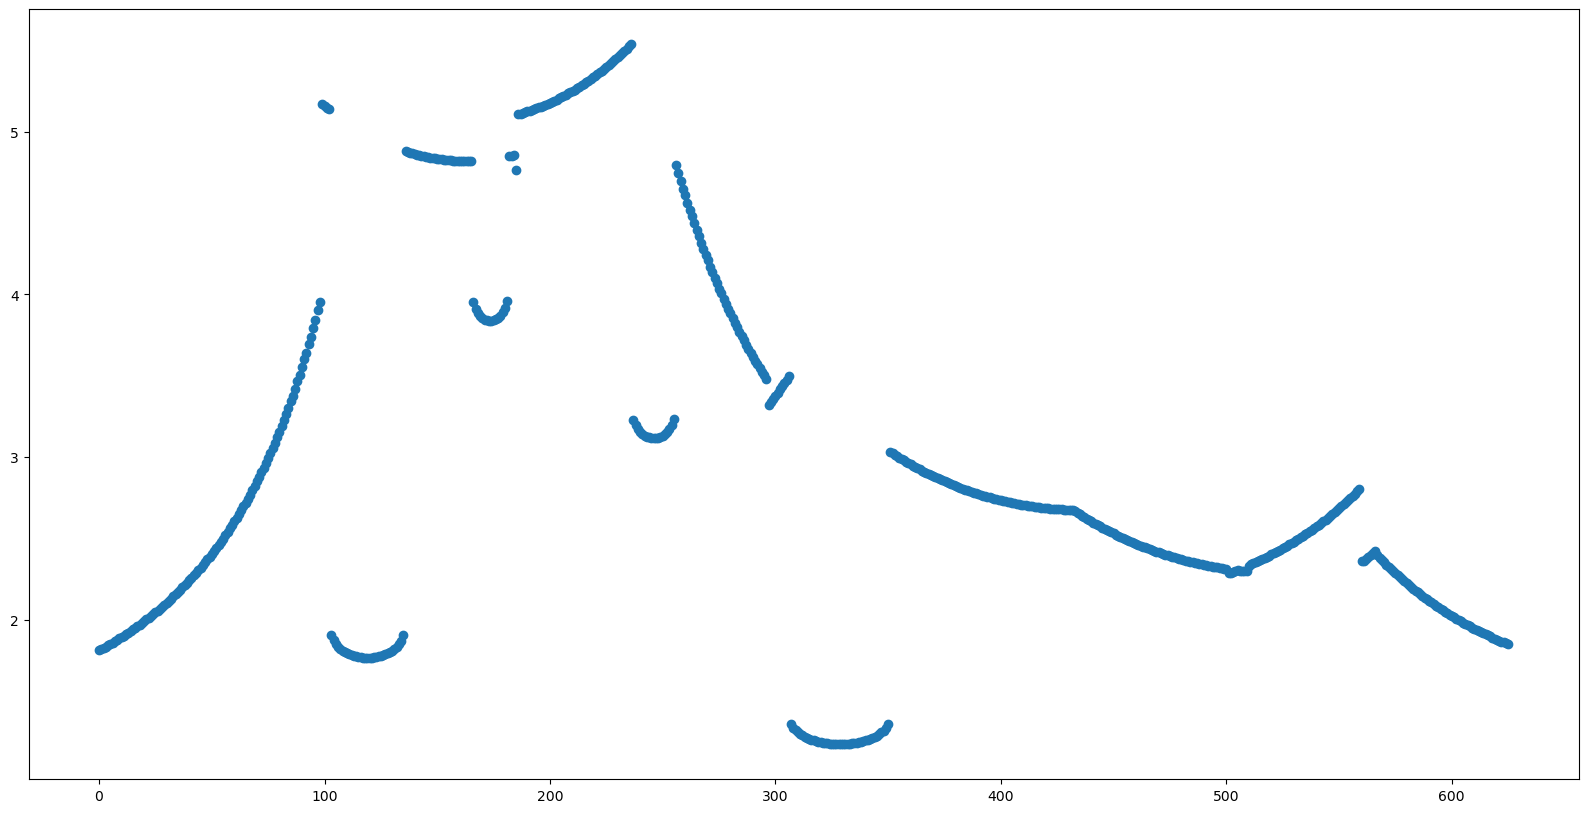

In [239]:
import matplotlib.pyplot as plt
# Inizializza una lista vuota per memorizzare tutti i dati
all_data = []
# Apri il file in modalità lettura
with open('data1.txt', 'r') as file:
    # Leggi tutte le righe del file
    lines = file.readlines()

    # Itera attraverso le righe
    for line in lines:
        # Rimuovi il carattere di nuova riga
        line = line.strip()

        # Dividi la riga in una lista di valori
        data = line.split(',')
        # Aggiungi la lista di valori alla lista di tutti i dati
        for i in range(len(data)):
            all_data.append(data[i])

#chek if the data is a string o a number
for i in range(len(all_data)):
    try:
        all_data[i] = float(all_data[i])
    except ValueError:
        print("error in line", i)
        print("invalid data:", all_data[i])
        # delete all_data[i] from the list

#delete the data with '' form all_data
all_data = [x for x in all_data if x != '']

dataCleand = all_data[20:-20]
plt.figure(figsize=(20, 10))
plt.scatter(range(len(dataCleand)),dataCleand)
plt.show()
        

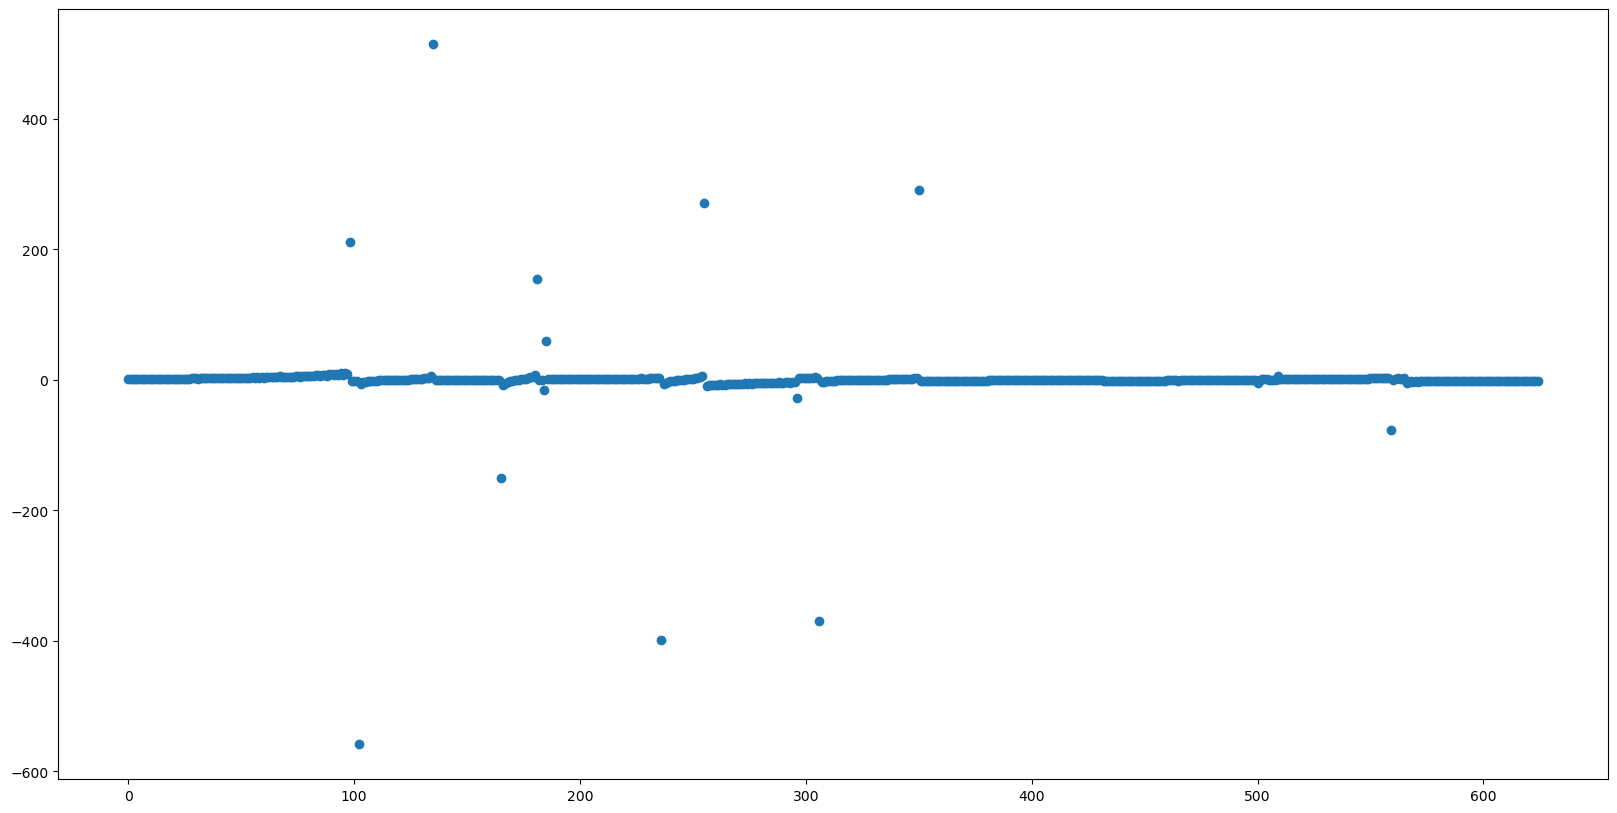

In [240]:
def diff_fin(fxh,fx,h):
    return (fxh-fx)/h

#costatnt 
h = 0.005774015095084906
derPrima = []
for i in range(len(dataCleand)-1):
    derPrima.append(diff_fin(dataCleand[i+1],dataCleand[i],h))

plt.figure(figsize=(20, 10))
plt.scatter(range(len(derPrima)),derPrima)
plt.show()


12


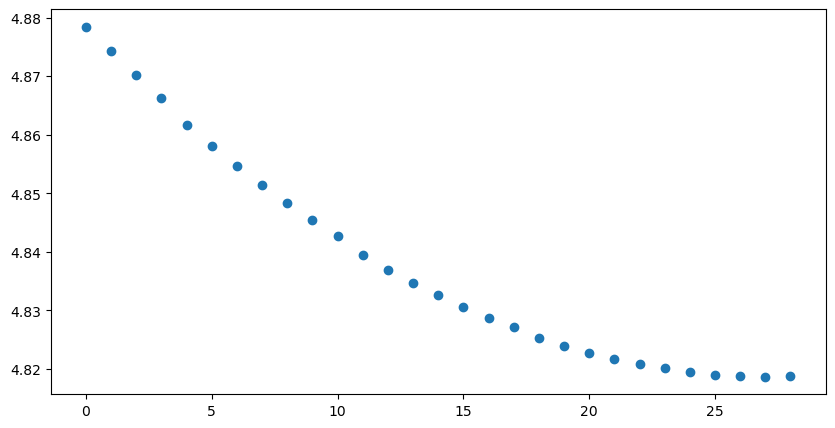

In [241]:



#devide the data in segment where the derivative if derivative is too big
segmentedData = []
segment = [] 
for i in range(len(dataCleand)-1):
    if abs(derPrima[i]) < 50:
        segment.append(dataCleand[i])
    else :
        segmentedData.append(segment)
        segment = []
segmentedData.append(segment)
print(len(segmentedData))

kpirnt = 3
plt.figure(figsize=(10, 5))
plt.scatter(range(len(segmentedData[kpirnt])),segmentedData[kpirnt])
plt.show()

   

In [242]:
#smooth data
def smooth_data(dataS, window_size):
    # Crea una lista vuota per memorizzare i dati
    smoothed_data = []
    # Itera attraverso i dati
    for i in range(len(dataS)):
        # Se il dato è troppo vicino al bordo, non è possibile calcolare la media
        if i < window_size or i >= len(dataS) - window_size:
            smoothed_data.append(dataS[i])
        else:
            # Calcola la media dei dati nel range
            total = 0
            for j in range(i - window_size, i + window_size + 1):
                total += dataS[j]
            smoothed_data.append(total / (window_size * 2 + 1)) 
    return smoothed_data

12


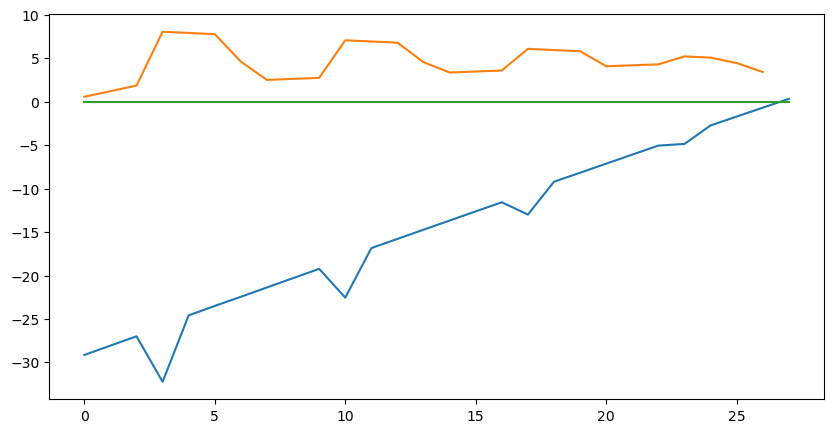

In [243]:
#calculate the derivative of the segmented data
derivativeSegmentedData = []
for i in range(len(segmentedData)):
    segmentder = []
    for j in range(len(segmentedData[i])-1):
        segmentder.append(diff_fin(segmentedData[i][j+1],segmentedData[i][j],h))
    derivativeSegmentedData.append(segmentder)

#smooth the segmented data
smoothedSegmentedData = []
for i in range(len(segmentedData)):
    smoothedSegmentedData.append(smooth_data(segmentedData[i], 1))

#calculate the derivative of the smoothed segmented data
derivativeSmoothedSegmentedData = []
for i in range(len(smoothedSegmentedData)):
    segmentderSS = []
    for j in range(len(smoothedSegmentedData[i])-1):
        segmentderSS.append(diff_fin(smoothedSegmentedData[i][j+1],smoothedSegmentedData[i][j],h))
    derivativeSmoothedSegmentedData.append(segmentderSS)

#smooth the derivative of the segmented data
smoothedDerivativeSegmentedData = []
for i in range(len(derivativeSegmentedData)):
    smoothedDerivativeSegmentedData.append(smooth_data(derivativeSmoothedSegmentedData[i], 1))

secondDerivativeSegmentedData = []
for i in range(len(smoothedDerivativeSegmentedData)):
    segmentderS = []
    for j in range(len(smoothedDerivativeSegmentedData[i])-1):
        segmentderS.append(diff_fin(smoothedDerivativeSegmentedData[i][j+1],smoothedDerivativeSegmentedData[i][j],h))
    secondDerivativeSegmentedData.append(segmentderS)

print(len(derivativeSegmentedData))

plt.figure(figsize=(10, 5))
firstDerivate = [x*40 for x in derivativeSegmentedData[kpirnt]]
plt.plot(firstDerivate)
plt.plot(secondDerivativeSegmentedData[kpirnt])
#pllot the 0 line
plt.plot([0 for x in range(len(firstDerivate))])
plt.show()


In [244]:
#find where first derivate is 0
zero = []
for i in range(len(derivativeSegmentedData)):
    for j in range(len(derivativeSegmentedData[i])-1):
        if derivativeSegmentedData[i][j] < 0 and derivativeSegmentedData[i][j+1] > 0:
            zero.append(i)
            break
        elif derivativeSegmentedData[i][j] > 0 and derivativeSegmentedData[i][j+1] < 0:
            zero.append(i)
            break

print(zero)

#chek if the second derivate has at leat one vale over 1200 and one under -1200
threshold_second_d = 750
del_zero = []
for i in range(len(zero)):
    if max(secondDerivativeSegmentedData[zero[i]]) > threshold_second_d or min(secondDerivativeSegmentedData[zero[i]]) < -threshold_second_d:
        print("found")
        del_zero.append(i)
        print(zero[i])

#delete the element in del_zero from zero
#for cycle from the end to the begin
for i in range(len(del_zero)-1,-1,-1):
    del zero[del_zero[i]]
print(zero)

[2, 3, 4, 7, 8, 9, 10, 11]
found
8
[2, 3, 4, 7, 9, 10, 11]


In [245]:
#che if the second derivate is 0 of the first derivate is 0
zero2 = []
for i in range(len(zero)):
    for j in range(len(secondDerivativeSegmentedData[zero[i]])-1):
        if secondDerivativeSegmentedData[zero[i]][j] < 0 and secondDerivativeSegmentedData[zero[i]][j+1] > 0:
            zero2.append(zero[i])
            break
        elif secondDerivativeSegmentedData[zero[i]][j] > 0 and secondDerivativeSegmentedData[zero[i]][j+1] < 0:
            zero2.append(zero[i])
            break

print(zero2)


[10, 11]
